In [1]:
from marubatsu import Marubatsu, Marubatsu_GUI
import matplotlib.patches as patches

@staticmethod
def draw_board(ax, mb, show_result=False, emphasize=False, dx=0, dy=0, lw=2):   
    # 結果によってゲーム盤の背景色を変更する
    if show_result:
        if mb.status == Marubatsu.PLAYING:
            bgcolor = "white"
        elif mb.status == Marubatsu.CIRCLE:
            bgcolor = "lightcyan"
        elif mb.status == Marubatsu.CROSS:
            bgcolor = "lavenderblush"
        else:
            bgcolor = "lightyellow"
        rect = patches.Rectangle(xy=(dx, dy), width=mb.BOARD_SIZE,
                                height=mb.BOARD_SIZE, fc=bgcolor)
        ax.add_patch(rect)
        
    # emphasize が True の場合は赤色の外枠を描画する
    if emphasize:
        frame = patches.Rectangle(xy=(dx, dy), width=mb.BOARD_SIZE,
                                height=mb.BOARD_SIZE, ec="red", fill=False, lw=lw)
        ax.add_patch(frame)
    
    # ゲーム盤の枠を描画する
    for i in range(1, mb.BOARD_SIZE):
        ax.plot([dx, dx + mb.BOARD_SIZE], [dy + i, dy + i], c="k", lw=lw) # 横方向の枠線
        ax.plot([dx + i, dx + i], [dy, dy + mb.BOARD_SIZE], c="k", lw=lw) # 縦方向の枠線

    # ゲーム盤のマークを描画する
    for y in range(mb.BOARD_SIZE):
        for x in range(mb.BOARD_SIZE):
            color = "red" if (x, y) == mb.last_move else "black"
            Marubatsu_GUI.draw_mark(ax, dx + x, dy + y, mb.board[x][y], color, lw=lw)
            
Marubatsu_GUI.draw_board = draw_board

In [2]:
from tree import Node
import matplotlib.pyplot as plt

def draw_node(self, ax=None, maxdepth=None, emphasize=False, size=0.25, lw=0.8, dx=0, dy=0):   
    width = 8
    if ax is None:
        height = len(self.children) * 4
        fig, ax = plt.subplots(figsize=(width * size, height * size))
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)   
        ax.invert_yaxis()
        ax.axis("off")
        for childnode in self.children:
            childnode.height = 4
        self.height = height
            
    # 自分自身のノードを真ん中の位置になるように (dx, dy) からずらして描画する
    y = dy + (self.height - 3) / 2
    Marubatsu_GUI.draw_board(ax, self.mb, show_result=True, emphasize=emphasize, lw=lw, dx=dx, dy=y)
    # 子ノードが存在する場合に、エッジの線と子ノードを描画する
    if len(self.children) > 0:
        if maxdepth != self.depth:   
            plt.plot([dx + 3.5, dx + 4], [y + 1.5, y + 1.5], c="k", lw=lw)
            prevy = None
            for childnode in self.children:
                childnodey = dy + (childnode.height - 3) / 2
                if maxdepth is None:
                    Marubatsu_GUI.draw_board(ax, childnode.mb, show_result=True, dx=dx+5, dy=childnodey, lw=lw)
                edgey = childnodey + 1.5
                plt.plot([dx + 4 , dx + 4.5], [edgey, edgey], c="k", lw=lw)
                if prevy is not None:
                    plt.plot([dx + 4 , dx + 4], [prevy, edgey], c="k", lw=lw)
                prevy = edgey
                dy += childnode.height
        else:
            plt.plot([dx + 3.5, dx + 4.5], [y + 1.5, y + 1.5], c="k", lw=lw)
            
Node.draw_node = draw_node

In [3]:
from tree import Mbtree

def draw_subtree(self, centernode=None, ax=None, size=0.25, lw=0.8, maxdepth=2):
    if centernode is None:
        centernode = self.root
    self.calc_node_height(maxdepth)
    width = 5 * (maxdepth + 1)
    height = centernode.height
    parent = centernode.parent
    if parent is not None:
        height += (len(parent.children) - 1) * 4
        parent.height = height
    if ax is None:
        fig, ax = plt.subplots(figsize=(width * size, height * size))
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)   
        ax.invert_yaxis()
        ax.axis("off")        
    
    nodelist = [centernode]
    depth = centernode.depth
    while len(nodelist) > 0 and depth <= maxdepth:        
        dy = 0
        if parent is not None:
            dy = parent.children.index(centernode) * 4
        childnodelist = []
        for node in nodelist:
            if node is None:
                dy += 4
                childnodelist.append(None)
            else:
                dx = 5 * node.depth
                emphasize = node is centernode
                node.draw_node(ax=ax, maxdepth=maxdepth, emphasize=emphasize, size=size, lw=lw, dx=dx, dy=dy)
                dy += node.height
                if len(node.children) > 0:  
                    childnodelist += node.children
                else:
                    childnodelist.append(None)
        depth += 1
        nodelist = childnodelist
        
    if parent is not None:
        dy = 0
        for sibling in parent.children:
            if sibling is not centernode:
                sibling.height = 4
                dx = 5 * sibling.depth
                sibling.draw_node(ax, maxdepth=sibling.depth, size=size, lw=lw, dx=dx, dy=dy)
            dy += sibling.height
        dx = 5 * parent.depth
        parent.draw_node(ax, maxdepth=maxdepth, size=size, lw=lw, dx=dx, dy=0)
    
        node = parent
        while node.parent is not None:
            node = node.parent
            node.height = height
            dx = 5 * node.depth
            node.draw_node(ax, maxdepth=node.depth, size=size, lw=lw, dx=dx, dy=0)
            
Mbtree.draw_subtree = draw_subtree

In [4]:
from tree import Mbtree_GUI
mbtree = Mbtree()
mbtree_gui = Mbtree_GUI(mbtree)

     9 depth 1 node created
    72 depth 2 node created
   504 depth 3 node created
  3024 depth 4 node created
 15120 depth 5 node created
 54720 depth 6 node created
148176 depth 7 node created
200448 depth 8 node created
127872 depth 9 node created
     0 depth 10 node created
total node num = 549946


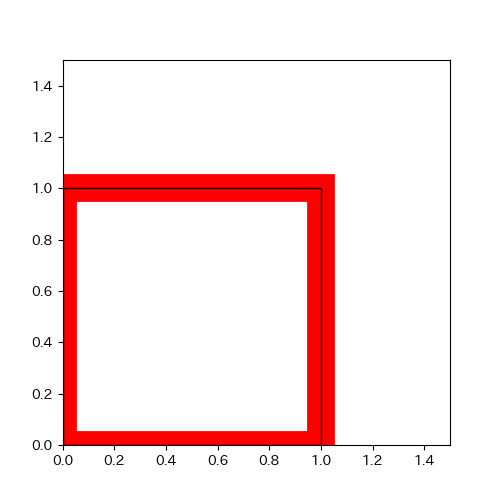

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1.5)
frame1 = patches.Rectangle(xy=(0, 0), width=1, height=1, ec="red", fill=False, lw=20)
ax.add_patch(frame1)
frame2 = patches.Rectangle(xy=(0, 0), width=1, height=1, ec="black", fill=False, lw=1)
ax.add_patch(frame2)

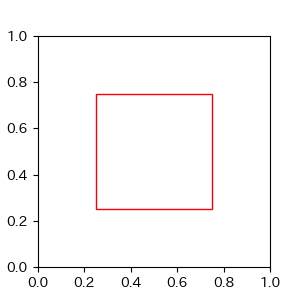

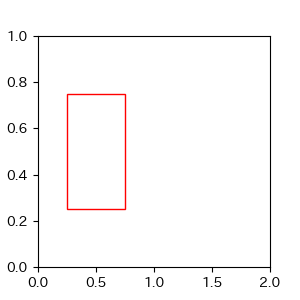

In [6]:
fig1, ax1 = plt.subplots(figsize=(3, 3))
ax1.set_xlim(0, 1)  # こちらは x 座標の範囲を 0 ～ 1 に設定する
ax1.set_ylim(0, 1)
frame1 = patches.Rectangle(xy=(0.25, 0.25), width=0.5, height=0.5, ec="red", fill=False, lw=1)
ax1.add_patch(frame1)

fig2, ax2 = plt.subplots(figsize=(3, 3))
ax2.set_xlim(0, 2)  # こちらは x 座標の範囲を 0 ～ 2 に設定する
ax2.set_ylim(0, 1)
frame2 = patches.Rectangle(xy=(0.25, 0.25), width=0.5, height=0.5, ec="red", fill=False, lw=1)
ax2.add_patch(frame2)

In [7]:
def update_gui(self):
    self.ax.clear()
    self.ax.set_xlim(-1, self.width - 1)
    self.ax.set_ylim(0, self.height)   
    self.ax.invert_yaxis()
    self.ax.axis("off")   
    
    maxdepth = min(self.centernode.depth + 1, 9)
    self.mbtree.draw_subtree(self.centernode, ax=self.ax, maxdepth=maxdepth)

Mbtree_GUI.update_gui = update_gui

In [8]:
mbtree_gui = Mbtree_GUI(mbtree)

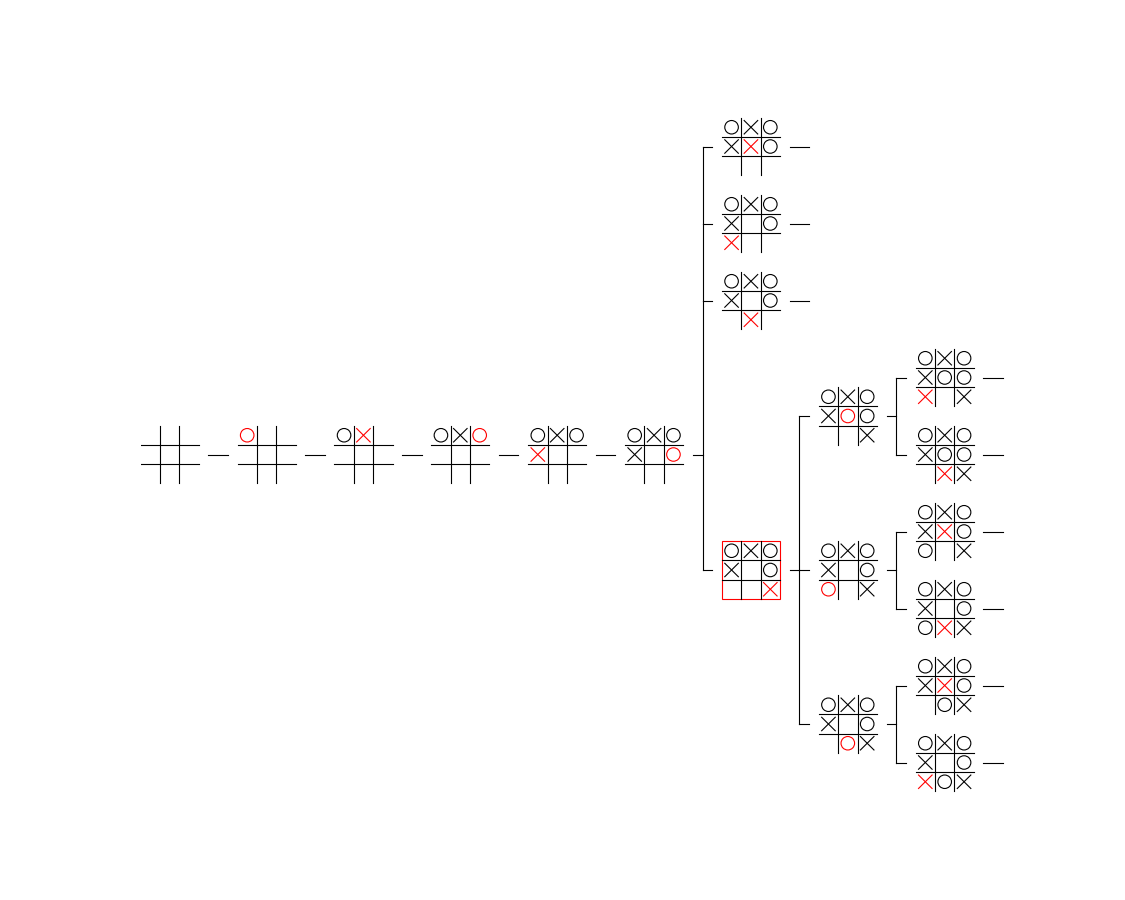

In [9]:
mbtree.draw_subtree(mbtree.nodelist_by_depth[6][7], maxdepth=8)

In [10]:
def update_gui(self):
    self.ax.clear()
    self.ax.set_xlim(-1, self.width - 1)
    self.ax.set_ylim(0, self.height)   
    self.ax.invert_yaxis()
    self.ax.axis("off")   
    
    if self.centernode.depth <= 4:
        maxdepth = self.centernode.depth + 1
    elif self.centernode.depth == 5:
        maxdepth = 7
    else:
        maxdepth = 9
    self.mbtree.draw_subtree(self.centernode, ax=self.ax, maxdepth=maxdepth)

Mbtree_GUI.update_gui = update_gui

In [11]:
mbtree_gui = Mbtree_GUI(mbtree)

In [12]:
def create_event_handler(self):
    def on_left_button_clicked(b=None):
        if self.centernode.parent is not None:
            self.centernode = self.centernode.parent
            self.update_gui()
            
    def on_right_button_clicked(b=None):
        if self.centernode.depth < 6 and len(self.centernode.children) > 0:
            self.centernode = self.centernode.children[0]
            self.update_gui()

    def on_up_button_clicked(b=None):
        if self.centernode.parent is not None:
            index = self.centernode.parent.children.index(self.centernode)
            if index > 0:
                self.centernode = self.centernode.parent.children[index - 1]
                self.update_gui()
            
    def on_down_button_clicked(b=None):
        if self.centernode.parent is not None:
            index = self.centernode.parent.children.index(self.centernode)
            if self.centernode.parent.children[-1] is not self.centernode:
                self.centernode = self.centernode.parent.children[index + 1]
                self.update_gui()            
            
    self.left_button.on_click(on_left_button_clicked)
    self.right_button.on_click(on_right_button_clicked)
    self.up_button.on_click(on_up_button_clicked)
    self.down_button.on_click(on_down_button_clicked)

    def on_key_press(event):
        keymap = {
            "left": on_left_button_clicked,
            "right": on_right_button_clicked,
            "up": on_up_button_clicked,
            "down": on_down_button_clicked,
        }
        if event.key in keymap:
            keymap[event.key]()
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)

Mbtree_GUI.create_event_handler = create_event_handler

In [13]:
mbtree_gui = Mbtree_GUI(mbtree)

In [14]:
from abc import ABCMeta, abstractmethod
import matplotlib as mlp
import ipywidgets as widgets

class GUI(metaclass=ABCMeta):
    """GUI の処理を行うクラスの基底クラス."""

    def __init__(self):
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')
        
        self.disable_shortcutkeys()
        self.create_widgets()
        self.create_event_handler()
        self.display_widgets() 
        self.update_gui()
       
    @abstractmethod
    def create_widgets(self):
        """ウィジェットを作成する."""        
        pass
    
    @abstractmethod
    def create_event_handler(self):
        """イベントハンドラを定義する."""        
        pass
    
    @abstractmethod
    def display_widgets(self):
        """ウィジェットを配置して表示する."""
        pass

    @abstractmethod
    def update_gui(self):
        """GUI の表示を更新する."""
        pass

    @staticmethod
    def disable_shortcutkeys():
        """matplotlib の Figure のデフォルトのショートカットキー操作を禁止する."""
        
        attrs = [ "fullscreen", "home", "back", "forward", "pan", "zoom", "save", "help",
                "quit", "quit_all", "grid", "grid_minor", "yscale", "xscale", "copy"]
        for attr in attrs:
            mlp.rcParams[f"keymap.{attr}"] = []     
            
    @staticmethod
    def create_button(description:str, width:float):   
        """ボタンのウィジェットを作成する.
            
        Args:        
            description:
                ボタンに表示する文字列
            width:
                ボタンの横幅
        """
        
        return widgets.Button(
            description=description,
            layout=widgets.Layout(width=f"{width}px"),
            style={"button_color": "lightgreen"},
        )   
        
    @staticmethod
    def set_button_status(button, disabled:bool):   
        """ ボタンのウィジェットの状態を設定する
    
        Args:
            button:
                ボタンのウィジェット
            disabled:
                False の場合は緑色で表示し、操作できるようにする
                True の場合は灰色で表示し、操作できないようにする
        """
        
        button.disabled = disabled
        button.style.button_color = "lightgray" if disabled else "lightgreen"   

In [15]:
def update_gui(self):
    self.ax.clear()
    self.ax.set_xlim(-1, self.width - 1)
    self.ax.set_ylim(0, self.height)   
    self.ax.invert_yaxis()
    self.ax.axis("off")   
    
    if self.centernode.depth <= 4:
        maxdepth = self.centernode.depth + 1
    elif self.centernode.depth == 5:
        maxdepth = 7
    else:
        maxdepth = 9
    self.mbtree.draw_subtree(self.centernode, ax=self.ax, maxdepth=maxdepth)
    
    disabled = self.centernode.parent is None
    self.set_button_status(self.left_button, disabled=disabled)
    disabled = self.centernode.depth >= 6 or len(self.centernode.children) == 0
    self.set_button_status(self.right_button, disabled=disabled)
    disabled = self.centernode.parent is None or self.centernode.parent.children.index(self.centernode) == 0
    self.set_button_status(self.up_button, disabled=disabled)
    disabled = self.centernode.parent is None or self.centernode.parent.children[-1] is self.centernode
    self.set_button_status(self.down_button, disabled=disabled)

Mbtree_GUI.update_gui = update_gui

In [16]:
mbtree_gui = Mbtree_GUI(mbtree)